In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [2]:
dataset_path = os.listdir('../dfd/dataset/')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['real', 'fake1']
Types of classes labels found:  2


In [3]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    print(class_labels[:5]) 

[('real', 'dataset_path/real/image54.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg'), ('real', 'dataset_path/real/image480.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg'), ('real', 'dataset_path/real/image480.jpg'), ('real', 'dataset_path/real/image85.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg'), ('real', 'dataset_path/real/image480.jpg'), ('real', 'dataset_path/real/image85.jpg'), ('real', 'dataset_path/real/image451.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg'), ('real', 'dataset_path/real/image480.jpg'), ('real', 'dataset_path/real/image85.jpg'), ('real', 'dataset_path/real/image451.jpg')]
[('real', 'dataset_path/real/image54.jpg'), ('real', 'dataset_path/real/image327.jpg'), ('real', 'dataset_path/real/image48

In [5]:
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                           image
0   real   dataset_path/real/image54.jpg
1   real  dataset_path/real/image327.jpg
2   real  dataset_path/real/image480.jpg
3   real   dataset_path/real/image85.jpg
4   real  dataset_path/real/image451.jpg
     Labels                            image
1057  fake1   dataset_path/fake1/image51.jpg
1058  fake1  dataset_path/fake1/image246.jpg
1059  fake1  dataset_path/fake1/image468.jpg
1060  fake1  dataset_path/fake1/image362.jpg
1061  fake1  dataset_path/fake1/image414.jpg


In [6]:
df = pd.DataFrame(data=[[0,'real'],[1,'fake1']], columns=['labels', 'image'])
print(df.head())
print(df.tail())
#colors_df = pd.DataFrame(data=[[5,'yellow'],[1,'red'],[2,'blue'],[3,'green'],[4,'blue'],[7,'purple']], columns=['id', 'color'])

   labels  image
0       0   real
1       1  fake1
   labels  image
0       0   real
1       1  fake1


In [6]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1062
real     542
fake1    520
Name: Labels, dtype: int64


In [7]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []
for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]

    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
    


In [8]:
#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1062, 224, 224, 3)

In [9]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
df['encod_labels'] = y_labelencoder.fit_transform (df['Labels'])
print (df)

['real' 'real' 'real' ... 'fake1' 'fake1' 'fake1']
     Labels                            image  encod_labels
0      real    dataset_path/real/image54.jpg             1
1      real   dataset_path/real/image327.jpg             1
2      real   dataset_path/real/image480.jpg             1
3      real    dataset_path/real/image85.jpg             1
4      real   dataset_path/real/image451.jpg             1
...     ...                              ...           ...
1057  fake1   dataset_path/fake1/image51.jpg             0
1058  fake1  dataset_path/fake1/image246.jpg             0
1059  fake1  dataset_path/fake1/image468.jpg             0
1060  fake1  dataset_path/fake1/image362.jpg             0
1061  fake1  dataset_path/fake1/image414.jpg             0

[1062 rows x 3 columns]


In [36]:
y=df['encod_labels'].values
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y)#.toarray()
print(Y[:5])
print(Y[35:])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1008, 224, 224, 3)
(1008, 2)
(54, 224, 224, 3)
(54, 2)


In [18]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

NUM_CLASSES = 2
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))


# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [19]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 2)                4052133   
                                                                 
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
32/32 - 69s - loss: 2.9419 - accuracy: 0.5456 - 69s/epoch - 2s/step
Epoch 2/30
32/32 - 53s - loss: 1.6990 - accuracy: 0.5883 - 53s/epoch - 2s/step
Epoch 3/30
32/32 - 53s - loss: 1.6600 - accuracy: 0.5446 - 53s/epoch - 2s/step
Epoch 4/30
32/32 - 51s - loss: 1.1398 - accuracy: 0.5645 - 51s/epoch - 2s/step
Epoch 5/30
32/32 - 50s - loss: 0.9813 - accuracy: 0.6399 - 50s/epoch - 2s/step
Epoch 6/30
32/32 - 51s - loss: 0.8693 - accur

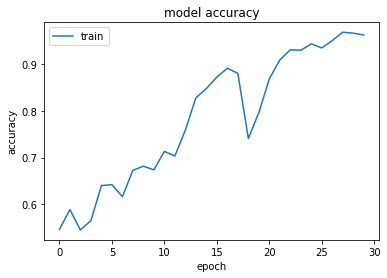

In [20]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

In [22]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Input image shape: (1, 224, 224, 3)


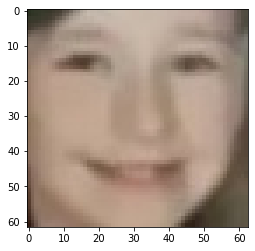

In [41]:
img_path = '../dfd/dataset/real/image5.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [45]:
preds=model.predict(x)
#print(preds)
preds

1/1 [==============================] - 0s 111ms/step


array([[0., 1.]], dtype=float32)

Input image shape: (1, 224, 224, 3)


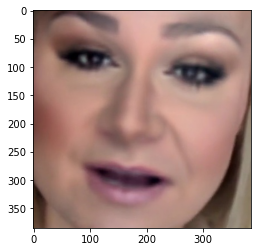

In [33]:
img_path = '../dfd/data/check_effb0/4.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds